# Import data

In [1]:
import pandas as pd
import numpy as np
import os.path
import regex

In [2]:
# Change to your directory
base_prefix = os.path.expanduser('~/Vanderbilt University/2021 Fall/DS5360_case1_team3/')
data_dir = base_prefix + '00-raw-data/'

In [3]:
# The file doesn't actually contain UTF-8 encoded data, so encoding should be ISO-8859-1
data = pd.read_csv(data_dir + "clean_dataset.csv", encoding = "ISO-8859-1")

# Drop an unnecessary column "Unnamed: 0"
data = data.drop(['Unnamed: 0'], axis=1)

In [4]:
data.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,p_co2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,p_h_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,p_o2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,ct_o2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print("This percentage of missing value of this dataset: {:.1f}".format(100*data.isna().to_numpy().sum()/(data.shape[0]*data.shape[1])))

This percentage of missing value of this dataset: 88.1


# Change string values into numerical value

In [6]:
# Find the columns of which values are string
columns_having_string = data.columns[data.dtypes==object].tolist()
print(columns_having_string)

['patient_id', 'strepto_a', 'fio2_venous_blood_gas_analysis', 'urine_esterase', 'urine_aspect', 'urine_p_h', 'urine_hemoglobin', 'urine_bile_pigments', 'urine_ketone_bodies', 'urine_nitrite', 'urine_urobilinogen', 'urine_protein', 'urine_leukocytes', 'urine_crystals', 'urine_hyaline_cylinders', 'urine_granular_cylinders', 'urine_yeasts', 'urine_color']


In [7]:
"""
Return unique values in a list

Input: list
Output: unique values in the list
"""
def unique(list):
    x = np.array(list)
    print(np.unique(x))

In [8]:
# Find the columns having string values.
for column in columns_having_string:
    values = data[column].tolist()
    unq_vaule = unique([x for x in values if type(x) == str])
    
    print(column)

['001646dfe0e98df' '0026b35811a9267' '00371001b52b72c' ...
 'ffd986615147da5' 'fff06e821fee7e7' 'fff6cd69cbbfe83']
patient_id
['0' '1' 'not_done']
strepto_a
[]
fio2_venous_blood_gas_analysis
['absent' 'not_done']
urine_esterase
['altered_coloring' 'clear' 'cloudy' 'lightly_cloudy']
urine_aspect
['5' '5.0' '5.5' '6' '6.0' '6.5' '7' '7.0' '7.5' '8.0' 'Não Realizado']
urine_p_h
['absent' 'not_done' 'present']
urine_hemoglobin
['absent' 'not_done']
urine_bile_pigments
['absent' 'not_done']
urine_ketone_bodies
['not_done']
urine_nitrite
['normal' 'not_done']
urine_urobilinogen
['absent' 'not_done']
urine_protein
['1000' '10000' '10600' '124000' '16000' '19000' '2000' '22000' '229000'
 '23000' '2500' '2600' '28000' '29000' '3000' '32000' '3310000' '38000'
 '4000' '40000' '43000' '4600' '5000' '5300' '5942000' '6000' '624000'
 '7000' '77000' '8000' '<1000']
urine_leukocytes
['Ausentes' 'Oxalato de Cálcio +++' 'Oxalato de Cálcio -++'
 'Urato Amorfo +++' 'Urato Amorfo --+']
urine_crystals
['abs

In [9]:
# Convert categorical to numerical
convert = {'positive': 1, 
        'negative': 0,
        'detected': 1, 
        'not_detected': 0,
        'not_done': np.NaN,
        'Não Realizado': np.NaN,
        'absent': 0, 
        'present': 1,
        'detected': 1, 
        'not_detected': 0,
        'normal': 1,
        'clear': 1, 
        'lightly_cloudy': 2, 
        'cloudy': 3, 
        'altered_coloring': 4,
        '<1000': 1000,
        'Ausentes': 0, 
        'Urato Amorfo --+': 1, 
        'Oxalato de Cálcio +++': 1,
        'Oxalato de Cálcio -++': 1, 
        'Urato Amorfo +++': 1,
        'light_yellow': 1, 
        'yellow': 2, 
        'citrus_yellow': 3, 
        'orange': 4
       }

data = data.replace(convert)

In [10]:
# Change datatype string to float
data['strepto_a'] = data['strepto_a'].astype('float')
data['urine_p_h'] = data['urine_p_h'].astype('float')
data['urine_leukocytes'] = data['urine_leukocytes'].astype('float')

# Remove unnecessary columns

If there is a column not performed to all positivie patients, they do not give any information when we predict COVID 19 status. Therefore, we are going to remove these columns.

In [11]:
test_column = data.columns.to_list()[6:-1]
covid_patient_all_null_test = data[data['sars_cov_2_exam_result']==1][test_column].apply(lambda col: col.isnull().all(), axis=0)
all_null_columns_covid = covid_patient_all_null_test[covid_patient_all_null_test==True]

In [12]:
unnecessary_column = all_null_columns_covid.index.tolist()
print("Unnecessary test not performed on covid patients:")
print(unnecessary_column)

Unnecessary test not performed on covid patients:
['mycoplasma_pneumoniae', 'fio2_venous_blood_gas_analysis', 'urine_nitrite', 'urine_sugar', 'partial_thromboplastin_time_ptt', 'prothrombin_time_pt_activity', 'vitamin_b12', 'd_dimer', 'albumin']


In [13]:
data = data.drop(columns=unnecessary_column)

In [14]:
data.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,p_co2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,p_h_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,p_o2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,ct_o2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


9 columns are dropped.

# Check Variance

If the variance is 0, all values are same in a column, which meams it is unnecessary column.

In [15]:
features = [col for col in data.columns if col not in ['patient_id', 
                                                    'sars_cov_2_exam_result	',
                                                    'patient_addmited_to_regular_ward_1_yes_0_no',
                                                    'patient_addmited_to_semi_intensive_unit_1_yes_0_no',
                                                    'patient_addmited_to_intensive_care_unit_1_yes_0_no']]
data[features].var()

patient_age_quantile                 33.384166
sars_cov_2_exam_result                0.089107
hematocrit                            1.001661
hemoglobin                            1.001661
platelets                             1.001664
                                       ...    
hco3_arterial_blood_gas_analysis      1.038462
p_o2_arterial_blood_gas_analysis      1.038462
arteiral_fio2                         1.052632
phosphor                              1.052632
ct_o2_arterial_blood_gas_analysis     1.038462
Length: 98, dtype: float64

In [16]:
data.drop('parainfluenza_2', axis=1, inplace=True)
features.remove('parainfluenza_2')

In [17]:
data.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,...,hb_saturation_arterial_blood_gases,p_co2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,p_h_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,p_o2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,ct_o2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,0,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


1 columns is dropped. Now 101 columns are left.

# Null values


In [29]:
# Calculate each column's percetage of null value 
data_null_pct = data[features].isna().mean().round(3) * 100

# Filter columns of which the percentage of null value is above 50%=
nulls = data_null_pct[data_null_pct > 50]
column_name_null_more_than_50 = nulls.index.tolist()

In [30]:
len(column_name_null_more_than_50)

95

95 columns have more than 50% null values.

### (1) Comparing each column's distribution of positive patients and negative patients.

If a specific column value's distribution of positive patients is similar to that of negative patients, the column is useless, since it does not give any information.

In [31]:
positive_patients = data[data["sars_cov_2_exam_result"] == 1]
negative_patients = data[data["sars_cov_2_exam_result"] == 0]

For example, compare neutrophils's distriution of positive patients and negative patients.

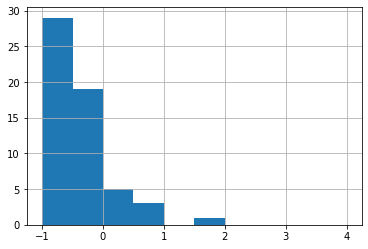

In [64]:
# Positive patients' neutrophils histogram.
(positive_patients[positive_patients.platelets.notnull()]["platelets"]).hist(range = [-1,4])

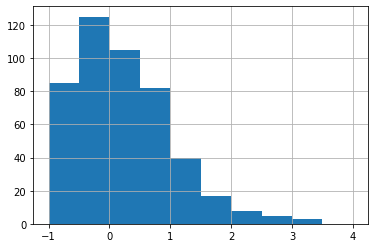

In [65]:
# negative patients' neutrophils histogram.
(negative_patients[negative_patients.platelets.notnull()]["platelets"]).hist(range = [-1,4])

By comparing the histogram above, we can tell their distributions are similar. Let's see their standard deviation.

In [67]:
# Standard deviation of positive patients' neutrohils 
positive_neutrohils_std = (positive_patients[positive_patients.platelets.notnull()]["platelets"]).std()
print(positive_neutrohils_std)

0.6477261694999746


In [68]:
# Standard deviation of negative patients' neutrohils 
negative_neutrohils_std = (negative_patients[negative_patients.platelets.notnull()]["platelets"]).std()
print(negative_neutrohils_std)

1.0015744905823023


In [69]:
abs(positive_neutrohils_std - negative_neutrohils_std)

0.35384832108232767

I am going to make an assumption that if the difference between two standard deviation is less than 0.1, their distribution is similar.

In [37]:
# Calculate all columns' difference of standard deviation between positive patients and negative patients
remove_column = []
delta_std = []
for column in data[column_name_null_more_than_50]:
    
    positive_patients_std = positive_patients[column].std(skipna = True)
    negative_patients_std = negative_patients[column].std(skipna = True)
    
    delta = abs(positive_patients_std - negative_patients_std)
    
    if delta <= 0.1:
        remove_column.append(column)
        delta_std.append(delta)

column_std = dict(zip(remove_column, delta_std))

In [38]:
sorted(column_std.items(), key=lambda x: x[1])

[('myeloblasts', 0.0),
 ('urine_esterase', 0.0),
 ('urine_bile_pigments', 0.0),
 ('urine_ketone_bodies', 0.0),
 ('urine_urobilinogen', 0.0),
 ('urine_protein', 0.0),
 ('urine_hyaline_cylinders', 0.0),
 ('urine_granular_cylinders', 0.0),
 ('urine_yeasts', 0.0),
 ('coronavirus229e', 0.014396404863644782),
 ('coronavirus_nl63', 0.018787718048594776),
 ('red_blood_cells', 0.039090375400992916),
 ('bordetella_pertussis', 0.040144756165374766),
 ('urine_color', 0.04606656431840883),
 ('parainfluenza_1', 0.049147222749841527),
 ('red_blood_cell_distribution_width_rdw', 0.05853424214613279),
 ('influenza_b_rapid_test', 0.06319732920051294),
 ('alkaline_phosphatase', 0.06440080480832111),
 ('proteina_c_reativa_mg_d_l', 0.06626406003789409),
 ('mean_corpuscular_volume_mcv', 0.06668996290692941),
 ('lactic_dehydrogenase', 0.06700446634050472),
 ('mean_corpuscular_hemoglobin_mch', 0.07250924289840588),
 ('influenza_b', 0.07462257950242074),
 ('lipase_dosage', 0.07902867598507934),
 ('coronavirus_o

In [39]:
# Drop the above columns
data = data.drop(columns = remove_column)

In [53]:
data.columns

Index(['patient_id', 'patient_age_quantile', 'sars_cov_2_exam_result',
       'patient_addmited_to_regular_ward_1_yes_0_no',
       'patient_addmited_to_semi_intensive_unit_1_yes_0_no',
       'patient_addmited_to_intensive_care_unit_1_yes_0_no', 'hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume', 'lymphocytes',
       'mean_corpuscular_hemoglobin_concentration_mchc', 'leukocytes',
       'basophils', 'eosinophils', 'monocytes', 'serum_glucose',
       'respiratory_syncytial_virus', 'influenza_a', 'rhinovirus_enterovirus',
       'coronavirus_hku1', 'adenovirus', 'parainfluenza_4', 'inf_a_h1n1_2009',
       'metapneumovirus', 'urea', 'creatinine', 'potassium',
       'influenza_a_rapid_test', 'alanine_transaminase',
       'aspartate_transaminase', 'gamma_glutamyltransferase',
       'total_bilirubin', 'direct_bilirubin', 'indirect_bilirubin',
       'ionized_calcium', 'strepto_a', 'magnesium',
       'p_co2_venous_blood_gas_analysis',
       'base_excess_venous_blo

### (2) Remove columns of which more than 90% of positive patients does not have value.

Making a decision using less than 10% of data is fallacy of generalization. Normally I set this number as 50%, but this data set already missed too many data, so I set 10%.

In [128]:
# Get dataset only having positive patients rows
positive_patients = data[data["sars_cov_2_exam_result"] == 1]

In [129]:
# Calculate the percentage of null values for each column
positive_null_pct = positive_patients.isna().mean().round(3) * 100

# Filter the columns of which the percentage of null value is more than 90%
nulls = positive_null_pct[positive_null_pct > 90]
column_name_null_more_than_90 = nulls.index.tolist()

In [130]:
len(column_name_null_more_than_90)

43

In 57 columns, 90% of positive patients does not have information. Therefore, I am going to delete these 57 columns.

In [131]:
data = data.drop(columns = column_name_null_more_than_90)

In [132]:
data.columns

Index(['patient_id', 'patient_age_quantile', 'sars_cov_2_exam_result',
       'patient_addmited_to_regular_ward_1_yes_0_no',
       'patient_addmited_to_semi_intensive_unit_1_yes_0_no',
       'patient_addmited_to_intensive_care_unit_1_yes_0_no', 'hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume', 'lymphocytes',
       'mean_corpuscular_hemoglobin_concentration_mchc', 'leukocytes',
       'basophils', 'eosinophils', 'monocytes', 'respiratory_syncytial_virus',
       'influenza_a', 'rhinovirus_enterovirus', 'coronavirus_hku1',
       'adenovirus', 'parainfluenza_4', 'inf_a_h1n1_2009', 'metapneumovirus',
       'urea', 'creatinine', 'potassium', 'influenza_a_rapid_test'],
      dtype='object')

In [133]:
len(data.columns)

28

Now we have only 28 columns.

# Convert to csv file

In [134]:
data.to_csv(base_prefix + "10-process-data/after_cleaning_dataset.csv", index = False)